Please upload the 'bank.csv' file from your local machine.
File 'bank.csv' has been uploaded.
--- Training the Logistic Regression model ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905


--- Model Coefficients ---


,Feature,Coefficient,Absolute_Coefficient
49,poutcome_success,1.531765,1.531765
42,month_mar,1.141585,1.141585
45,month_oct,1.137456,1.137456
3,duration,1.105673,1.105673
50,poutcome_unknown,-0.957214,0.957214
34,contact_unknown,-0.918261,0.918261
39,month_jan,-0.911162,0.911162
47,poutcome_failure,-0.894006,0.894006
44,month_nov,-0.825389,0.825389
40,month_jul,-0.740532,0.740532


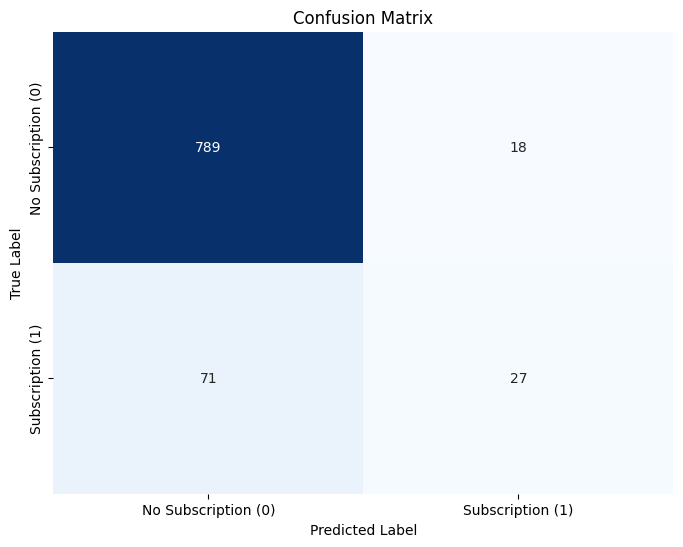

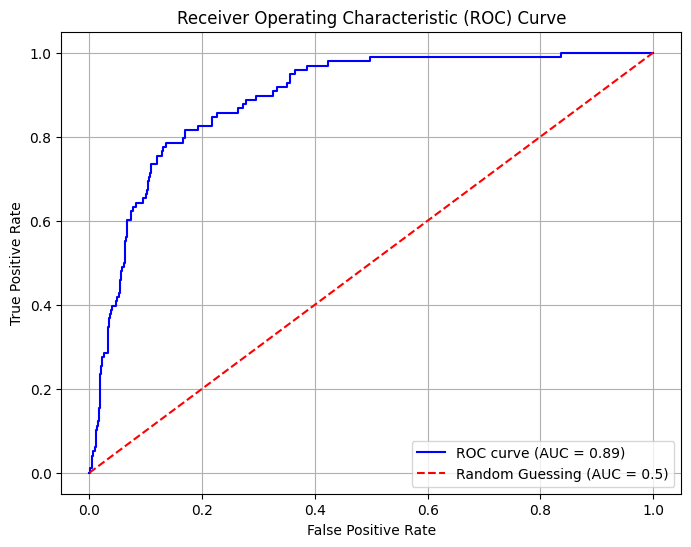

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import display
from google.colab import files

# --- Step 1: Upload the file ---
print("Please upload the 'bank.csv' file from your local machine.")
filename = 'bank.csv'
print(f"File '{filename}' has been uploaded.")

# --- Step 2: Load and inspect the dataset ---
df = pd.read_csv(filename, sep=';')
df['y'] = df['y'].map({'no': 0, 'yes': 1})
X = df.drop('y', axis=1)
y = df['y']

# --- Step 3: Data Preprocessing ---
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Step 4: Create and Train the Logistic Regression Model ---
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear'))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Training the Logistic Regression model ---")
model.fit(X_train, y_train)

# --- Step 5: Evaluate the model's performance on the test set ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# --- Print Model Coefficients ---
print("\n--- Model Coefficients ---")
# Get the feature names after one-hot encoding
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine numerical and one-hot encoded feature names
feature_names = list(numerical_features) + list(ohe_feature_names)
coefficients = model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
display(coef_df)

# --- Plot Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription (0)', 'Subscription (1)'],
            yticklabels=['No Subscription (0)', 'Subscription (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Plot ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()